# Take a look at the environment

In [1]:
# Function to display images in a grid using Matplotlib
def display_image_grid(images, rows, cols, titles):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    axes = axes.ravel()
    
    for i in range(len(images)):
        if len(images[i].shape) == 2:  # Grayscale image
            axes[i].imshow(images[i], cmap='gray')
        else:  # Color image (RGB)
            axes[i].imshow(images[i])
        axes[i].set_title(titles[i])
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()


def process_image(image):
    images = []
    titles = []
    
    # Raw
    images.append(image)
    titles.append("Raw state image")
    
    # RGB version
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(rgb_image)
    titles.append("RGB image")
    
    # Convert the state (image) to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(gray_image)
    titles.append("Grayscale image")
    
    # Apply Binary threshold (fixing the bug)
    _, gray_thresh_image = cv2.threshold(gray_image, 199, 1, cv2.THRESH_BINARY_INV)
    images.append(gray_thresh_image)
    titles.append("Grayscale threshold image")

    return images, titles

    

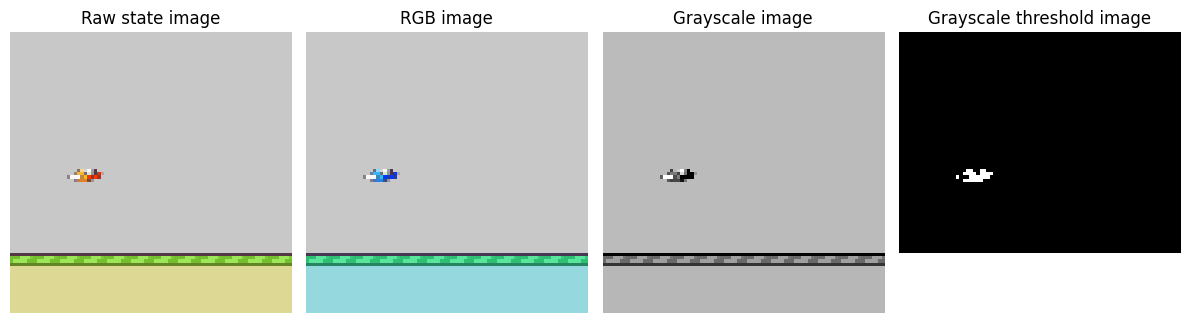

In [2]:
import cv2
import numpy as np
import flappy_bird_gym
import matplotlib.pyplot as plt

# Initialize Flappy Bird environment
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
obs = env.reset()


# Rotate the image to play state
obs = cv2.transpose(obs)
imageSize = (84, 84)
obs = cv2.resize(obs, imageSize)

# Close the environment
env.close()

processed_images, titles = process_image(obs)

# Displaying images in a grid
display_image_grid(processed_images, rows=1, cols=4, titles=titles)



# Environment with obstacles

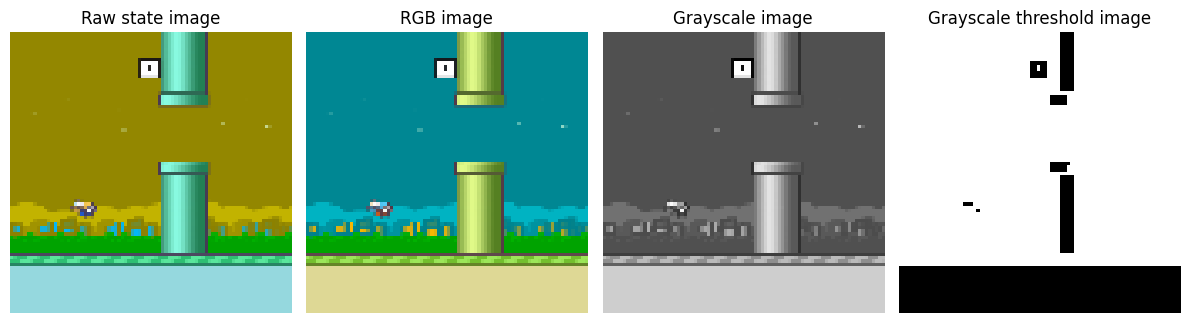

In [3]:
import cv2
import numpy as np
import flappy_bird_gym
import matplotlib.pyplot as plt
from PIL import Image

imageSize = (84, 84)
obstracle_image = cv2.imread('./game_image_init.png')
obstracle_image = cv2.resize(obstracle_image, imageSize)

processed_images, titles = process_image(obstracle_image)
# Displaying images in a grid
display_image_grid(processed_images, rows=1, cols=4, titles=titles)


# Environment possible actions

In [4]:
env = flappy_bird_gym.make("FlappyBird-rgb-v0")
obs = env.reset()
print("Action space:", env.action_space)
env.close()

Action space: Discrete(2)
